#### NLTK Documentation http://www.nltk.org/

#### Let's import the nltk module
#### To start, we need some text to play with. NLTK has many corpora and resources for you to explore natural language. 
#### A one-off run of nltk.download() will get you all the resources in one go. Once you've done that you should have 
#### a repository of interesting texts including stuff like Moby Dick and an Inaugural Address Corpus

In [1]:
import nltk

In [6]:
# nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
# nltk.download("book")

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#### These texts have now been loaded and you can refer to them by their names. These are objects of type 'Text' and they have a
#### bunch of cool methods to explore the text 

#### concordance will print all the occurrences of a word along with some context. Let's explore two texts - Moby Dick and 
#### Sense and Sensibility. As expected, word usage and language in both these books are pretty different :) 

In [4]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [3]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


##### As you can see, Melville uses the word 'monstrous' in a different connotation than Austen. He uses it to indicate
##### size and things that are terrifying, Austen uses it in a positive connotation
##### Let's see what other words appear in the same context as monstrous

In [5]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


##### Clearly Austen uses "monstrous" to represent positive emotions and to amplify those emotions. She seems to use it 
##### with "very" 

In [5]:
text2.common_contexts(["monstrous","very"])

a_pretty am_glad a_lucky is_pretty be_glad


##### These are fun ways to explore the usage of natural language in different contexts or situations. Let's see how the 
##### usage of certain words by Presidents has changed over the years. 
##### (Do install matplotlib before you run the below line of code)

In [6]:
text4.dispersion_plot(["citizens","democracy","freedom","duties","America"])

<Figure size 640x480 with 1 Axes>

##### Let's see what kind of emotions are expressed in Jane Austen's works vs Herman Melville's

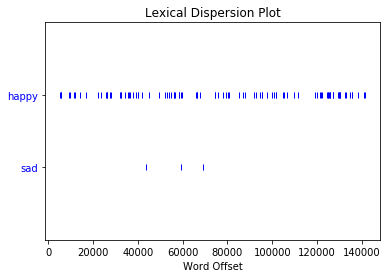

In [7]:
text2.dispersion_plot(["happy","sad"])

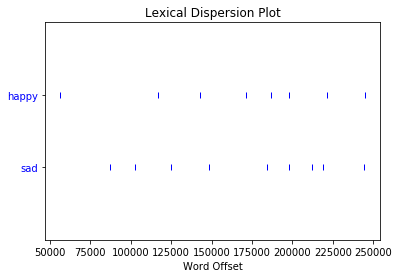

In [8]:
text1.dispersion_plot(["happy","sad"])

##### Now let's get to some serious stuff. Often you want to extract features from 
##### a text - these are attributes that will represent the text - words or sentences 
##### How do we split a piece of text into constituent sentences/words? (these are called tokens)

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
text="Mary had a little lamb. Her fleece was white as snow"
sents=sent_tokenize(text)
print(sents)

['Mary had a little lamb.', 'Her fleece was white as snow']


In [10]:
words=[word_tokenize(sent) for sent in sents]
print(words)

[['Mary', 'had', 'a', 'little', 'lamb', '.'], ['Her', 'fleece', 'was', 'white', 'as', 'snow']]


##### Let's filter out stopwords (words that are very common like 'was', 'a', 'as etc)

In [11]:
from nltk.corpus import stopwords 
from string import punctuation
customStopWords=set(stopwords.words('english')+list(punctuation))
#Notice how we made the stopwords a set

In [12]:
wordsWOStopwords=[word for word in word_tokenize(text) if word not in customStopWords]
print(wordsWOStopwords)

['Mary', 'little', 'lamb', 'Her', 'fleece', 'white', 'snow']


In [13]:
# 'close' appears in different morphological forms here, stemming will reduce all forms of the word 'close' to its root
# NLTK has multiple stemmers based on different rules/algorithms. Stemming is also known as lemmatization. 

In [14]:
text2="Mary closed on closing night when she was in the mood to close."
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
stemmedWords=[st.stem(word) for word in word_tokenize(text2)]
print(stemmedWords)

['mary', 'clos', 'on', 'clos', 'night', 'when', 'she', 'was', 'in', 'the', 'mood', 'to', 'clos', '.']


##### NLTK has functionality to automatically tag words as nouns, verbs, conjunctions etc

In [15]:
nltk.pos_tag(word_tokenize(text2))

[('Mary', 'NNP'),
 ('closed', 'VBD'),
 ('on', 'IN'),
 ('closing', 'NN'),
 ('night', 'NN'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mood', 'NN'),
 ('to', 'TO'),
 ('close', 'VB'),
 ('.', '.')]

##### Collocations are expressions of multiple words which commonly co-occur. For example New York

In [16]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(wordsWOStopwords)
sorted(finder.ngram_fd.items())

[(('Her', 'fleece'), 1),
 (('Mary', 'little'), 1),
 (('fleece', 'white'), 1),
 (('lamb', 'Her'), 1),
 (('little', 'lamb'), 1),
 (('white', 'snow'), 1)]

##### Synset: a set of synonyms that share a common meaning.
WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus.

You can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more

In [18]:
from nltk.corpus import wordnet as wn
for ss in wn.synsets('bass'):
    print(ss, ss.definition())

Synset('bass.n.01') the lowest part of the musical range
Synset('bass.n.02') the lowest part in polyphonic music
Synset('bass.n.03') an adult male singer with the lowest voice
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
Synset('freshwater_bass.n.01') any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
Synset('bass.n.06') the lowest adult male singing voice
Synset('bass.n.07') the member with the lowest range of a family of musical instruments
Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('bass.s.01') having or denoting a low vocal or instrumental range


In [19]:
from nltk.wsd import lesk
sense1 = lesk(word_tokenize("Sing in a lower tone, along with the bass"),'bass')
print(sense1, sense1.definition())

Synset('bass.n.07') the member with the lowest range of a family of musical instruments


In [20]:
sense2 = lesk(word_tokenize("This sea bass was really hard to catch"),'bass')
print(sense2, sense2.definition())

Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
